# <font color='blue'> i. Title </font>

## <font color='green'> Predictive Power: Unleashing Machine Learning for Home Credit Default Analysis </font>

Dalam project ini, saya memperkenalkan pendekatan inovatif yang menggabungkan analisis default Home Credit dengan Machine Learning (ML). Dengan Machine Learning, saya menganalisis data kredit rumah untuk memprediksi risiko default secara akurat. Project ini bertujuan untuk memberikan pemahaman yang lebih mendalam tentang faktor-faktor yang mempengaruhi default kredit rumah yang dapat digunakan untuk meningkatkan pengambilan keputusan dalam industri Jasa Keuangan. Dengan memanfaatkan kemampuan prediktif Machine Learning, saya berharap dapat membantu pemberi pinjaman dalam mengelola risiko kredit rumah dengan lebih efektif dan meminimalkan potensi kerugian.

# <font color='blue'> ii. Introduction </font>

* ### Nama : Mangara Haposan Immanuel Siagian
* ### Batch : FTDS-RMT-019

Mangara, seorang Data Scientist dari Hacktiv8, memiliki latar belakang pengetahuan sebelumnya dalam Teknik Sipil. Kombinasi keahlian dalam Teknik Sipil dan analisis data membuat Mangara dapat menerapkan pendekatan yang terstruktur dan detail dalam mengolah data. Mangara dapat mengidentifikasi pola-pola penting dan mengambil keputusan yang informasinya lebih lengkap dan terperinci.

# <font color='blue'> iii. External Link </font>

* Dataset link: https://www.kaggle.com/competitions/home-credit-default-risk/data
* Deployment link: https://mangara01-hacktiv8-home-credit-default-deploymentapp-amvpza.streamlit.app/

# <font color='blue'> iv. Working Area </font>

## <font color='green'> a. Import Libraries </font>

In [1]:
# Import Library yang digunakan
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import json

## <font color='green'> b. Data Loading </font>

In [2]:
# Import data yang diolah
data_fp1 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\application_train.csv')
data_fp2 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\bureau.csv')
data_fp3 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\bureau_balance.csv')
data_fp4 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\POS_CASH_balance.csv')
data_fp5 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\credit_card_balance.csv')
data_fp6 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\previous_application.csv')
data_fp7 = pd.read_csv(r'C:\Users\MANGARA HAPOSAN\Downloads\home-credit-default-risk\installments_payments.csv')

Untuk analisis Home Credit, tabel-tabel yang paling relevan adalah:

**bureau.csv**: Tabel ini berisi informasi tentang riwayat kredit pelanggan di lembaga keuangan lain. Data pada tabel ini dapat memberikan wawasan tentang sejarah kredit pelanggan sebelumnya, termasuk informasi tentang pinjaman, tunggakan, dan kinerja pembayaran sebelumnya. Data ini dapat membantu dalam penilaian risiko kredit dan pemodelan pelanggan.

**previous_application.csv**: Tabel ini berisi informasi tentang aplikasi kredit pelanggan sebelumnya di Home Credit. Data pada tabel ini mencakup informasi seperti jenis produk yang diajukan, jumlah pinjaman, hasil persetujuan, dan alasan penolakan jika ada. Tabel ini penting untuk menganalisis pola aplikasi pelanggan, hasil persetujuan, dan informasi penting lainnya terkait aplikasi sebelumnya.

**installments_payments.csv**: Tabel ini berisi informasi tentang pembayaran cicilan pelanggan untuk pinjaman sebelumnya. Data pada tabel ini mencakup tanggal pembayaran, jumlah pembayaran, keterlambatan pembayaran, dan informasi terkait lainnya. Analisis pada tabel ini dapat memberikan wawasan tentang kebiasaan pembayaran pelanggan dan kemampuan mereka untuk melunasi pinjaman secara tepat waktu.

Tabel-tabel di atas memberikan informasi penting yang relevan untuk menganalisis kredit pelanggan, sejarah pembayaran, dan risiko kredit, oleh sebab itu digunakan tabel seperti yang disebutkan diatas.

### Melakukan Penggabungan Tabel menggunakan Query SQL

In [3]:
# Buat database SQLite dan buat koneksi
conn = sqlite3.connect('database.db')

### Simpan DataFrames dalam database
* data_fp1.to_sql('table1', conn, index=False)
* data_fp2.to_sql('table2', conn, index=False)
* data_fp3.to_sql('table3', conn, index=False)
* data_fp4.to_sql('table4', conn, index=False)
* data_fp5.to_sql('table5', conn, index=False)
* data_fp6.to_sql('table6', conn, index=False)
* data_fp7.to_sql('table7', conn, index=False)

In [4]:
# Lakukan operasi SQL
query = '''
SELECT
table1.SK_ID_CURR,
table1.TARGET,
table1.NAME_CONTRACT_TYPE,
table1.CODE_GENDER,
table1.NAME_EDUCATION_TYPE,
table1.NAME_FAMILY_STATUS,
table1.NAME_HOUSING_TYPE,
table1.OCCUPATION_TYPE,
table1.NAME_INCOME_TYPE,
table1.NAME_TYPE_SUITE,
table1.ORGANIZATION_TYPE,
table1.HOUSETYPE_MODE,
table2.CREDIT_ACTIVE,           
table2.DAYS_CREDIT,               
table2.DAYS_CREDIT_ENDDATE,     
table2.DAYS_ENDDATE_FACT,       
table2.AMT_CREDIT_MAX_OVERDUE,  
table2.AMT_CREDIT_SUM,          
table2.CREDIT_TYPE,              
table2.DAYS_CREDIT_UPDATE,                                                  
table6.AMT_APPLICATION,              
table6.NAME_PAYMENT_TYPE,                       
table6.NAME_GOODS_CATEGORY,          
table6.NAME_PORTFOLIO,                
table6.NAME_PRODUCT_TYPE,             
table6.NAME_YIELD_GROUP,              
table6.PRODUCT_COMBINATION,           
table7.DAYS_INSTALMENT,         
table7.DAYS_ENTRY_PAYMENT,     
table7.AMT_INSTALMENT,          
table7.AMT_PAYMENT             
FROM table1
LEFT JOIN table2 
ON table1.SK_ID_CURR = table2.SK_ID_CURR
LEFT JOIN table6 
ON table1.SK_ID_CURR = table6.SK_ID_CURR
LEFT JOIN table7
ON table6.SK_ID_PREV = table7.SK_ID_PREV
LIMIT 1000000
'''
data_fp = pd.read_sql_query(query, conn)

Pemilihan kolom pada query diatas dilakukan dengan cara korelasi, dimana:
1. Dicoba table1 untuk menentukan kolom yang paling signifikan terhadap kolom target.
2. Dicoba table2 yang sudah digabungkan sebelumnya dengan table1 untuk menetukan kolom yang paling signifikan terhadap kolom target.
3. Dicoba table6 yang sudah digabungkan sebelumnya dengan table1 & table2 untuk menetukan kolom yang paling signifikan terhadap kolom target.
4. Dicoba table7 yang sudah digabungkan sebelumnya dengan table1, table2 & table6 untuk menetukan kolom yang paling signifikan terhadap kolom target.

Pemilihan kolom juga dilakukan dengan cara trial-error, dimana menghapus kolom tersebut jika membuat jumlah nunique dalam kolom TARGET berkurang setelah dilakukan penghapusan baris yang tidak memiliki nilai dan yang memiliki nilai duplikat.

In [5]:
# Tutup koneksi database
conn.close()

### Analisis Data hasil query SQL

In [6]:
# Menampilkan kolom-kolom yang terdapat di dalam file hasil query SQL
data_fp.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,...,NAME_PAYMENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1,Cash loans,M,Secondary / secondary special,Single / not married,House / apartment,Laborers,Working,Unaccompanied,...,XNA,Vehicles,POS,XNA,low_normal,POS other with interest,-565.0,-587.0,9251.775,9251.775


In [7]:
# Menghapus baris yang tidak memiliki nilai dan yang memiliki nilai duplikat
data = data_fp.dropna().drop_duplicates()

Penghapusan baris dilakukan untuk mendapatkan nilai semurni mungkin.

## <font color='green'> c. Exploratory Data Analysis (EDA) </font>

In [8]:
# Pengecekan nilai unique untuk masing-masing kolom
data.nunique()

SK_ID_CURR                 850
TARGET                       2
NAME_CONTRACT_TYPE           2
CODE_GENDER                  2
NAME_EDUCATION_TYPE          5
NAME_FAMILY_STATUS           5
NAME_HOUSING_TYPE            6
OCCUPATION_TYPE             18
NAME_INCOME_TYPE             3
NAME_TYPE_SUITE              7
ORGANIZATION_TYPE           48
HOUSETYPE_MODE               3
CREDIT_ACTIVE                3
DAYS_CREDIT               1391
DAYS_CREDIT_ENDDATE       1464
DAYS_ENDDATE_FACT         1361
AMT_CREDIT_MAX_OVERDUE     447
AMT_CREDIT_SUM            1536
CREDIT_TYPE                  6
DAYS_CREDIT_UPDATE        1326
AMT_APPLICATION           1521
NAME_PAYMENT_TYPE            4
NAME_GOODS_CATEGORY         21
NAME_PORTFOLIO               3
NAME_PRODUCT_TYPE            3
NAME_YIELD_GROUP             5
PRODUCT_COMBINATION         16
DAYS_INSTALMENT           2829
DAYS_ENTRY_PAYMENT        2838
AMT_INSTALMENT            7594
AMT_PAYMENT               9572
dtype: int64

In [9]:
# Melihat deskripsi data
data.describe()

,SK_ID_CURR,TARGET,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,AMT_APPLICATION,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,75716.000000,75716.000000,75716.000000,75716.000000,75716.000000,75716.000000,7.571600e+04,75716.000000,7.571600e+04,75716.000000,75716.000000,7.571600e+04,7.571600e+04
mean,102901.777709,0.040414,-1488.235036,-722.315627,-1136.328345,3037.196967,2.800638e+05,-1076.419462,1.892252e+05,-1044.774196,-1054.027431,1.893194e+04,1.946950e+04
std,1809.546301,0.196930,824.203318,1974.001119,803.912431,15679.040135,1.613675e+06,780.917652,3.013317e+05,762.582712,762.893546,6.409479e+04,6.867514e+04
min,100002.000000,0.000000,-2922.000000,-2769.000000,-2834.000000,0.000000,0.000000e+00,-2834.000000,0.000000e+00,-2891.000000,-2906.000000,1.800000e-01,0.000000e+00
25%,101232.000000,0.000000,-2307.000000,-1871.000000,-1892.000000,0.000000,4.106700e+04,-1683.000000,2.875500e+04,-1642.000000,-1652.000000,4.500000e+03,3.798765e+03
50%,102949.000000,0.000000,-1338.000000,-782.000000,-918.000000,0.000000,8.398080e+04,-829.000000,8.275950e+04,-863.000000,-873.000000,9.000000e+03,8.880075e+03
75%,104356.000000,0.000000,-766.000000,-269.000000,-457.000000,0.000000,1.800000e+05,-440.000000,2.025000e+05,-388.000000,-397.000000,1.749756e+04,1.713879e+04
max,106134.000000,1.000000,-29.000000,30964.000000,-9.000000,633056.040000,3.955500e+07,-8.000000,2.250000e+06,-3.000000,-3.000000,2.197131e+06,2.197131e+06


Dari hasil dapat disimpulkan:
* Data terdiri dari 75.716 baris.
* Rata-rata target adalah 0,04 yang menunjukkan bahwa sebagian besar kredit tidak mengalami default.
* Terdapat perbedaan skala antara variabel-variabel numerik sehingga diperlukan standarisasi agar variabel memiliki skala yang sama.

In [10]:
# Memeriksa jumlah missing values pada setiap kolom
print(data.isnull().sum())

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
OCCUPATION_TYPE           0
NAME_INCOME_TYPE          0
NAME_TYPE_SUITE           0
ORGANIZATION_TYPE         0
HOUSETYPE_MODE            0
CREDIT_ACTIVE             0
DAYS_CREDIT               0
DAYS_CREDIT_ENDDATE       0
DAYS_ENDDATE_FACT         0
AMT_CREDIT_MAX_OVERDUE    0
AMT_CREDIT_SUM            0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
AMT_APPLICATION           0
NAME_PAYMENT_TYPE         0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64


Dari hasil dapat disimpulkan bahwa tidak ada missing value untuk semua kolom yang digunakan.

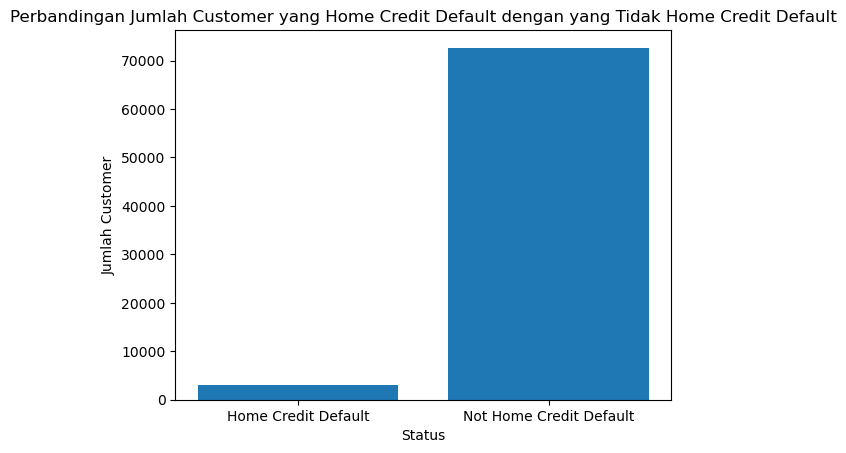

In [11]:
# Grafik perbandingan jumlah customer yang Home Credit Default dengan yang tidak Home Credit Default
count_risk = data[data['TARGET'] == 1]['TARGET'].count()
count_safe = data[data['TARGET'] == 0]['TARGET'].count()

labels = ['Home Credit Default', 'Not Home Credit Default']
values = [count_risk, count_safe]

plt.bar(labels, values)
plt.xlabel('Status')
plt.ylabel('Jumlah Customer')
plt.title('Perbandingan Jumlah Customer yang Home Credit Default dengan yang Tidak Home Credit Default')
plt.show()

Dari grafik dapat disimpulkan bahwa jumlah kedua status tidak seimbang, oleh sebab itu pengolahan data train dan test dilakukan dengan cara stratify untuk memastikan pendistribusian data seimbang.

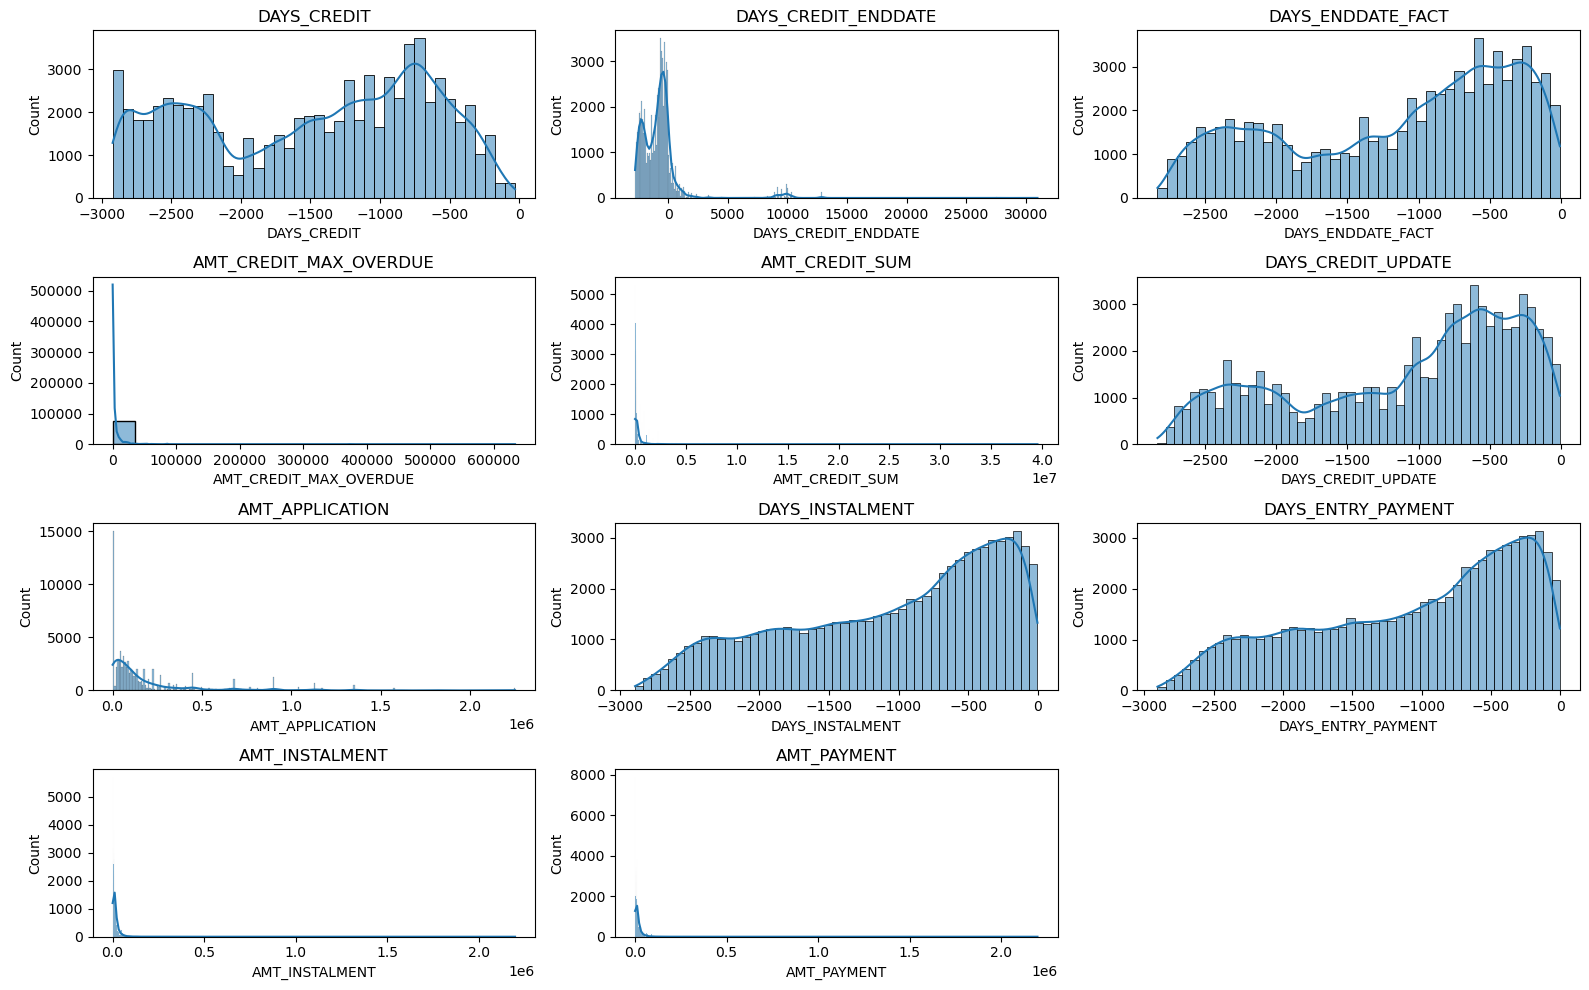

In [12]:
# Visualisasi distribusi variabel numerik
numeric_cols = ['DAYS_CREDIT','DAYS_CREDIT_ENDDATE','DAYS_ENDDATE_FACT','AMT_CREDIT_MAX_OVERDUE','AMT_CREDIT_SUM',
                'DAYS_CREDIT_UPDATE','AMT_APPLICATION','DAYS_INSTALMENT','DAYS_ENTRY_PAYMENT','AMT_INSTALMENT','AMT_PAYMENT']

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Dari grafik dapat disimpulkan:
* Kolom DAYS_CREDIT, DAYS_ENDDATE_FACT, DAYS_CREDIT_UPDATE, DAYS_INSTALMENT, DAYS_ENTRY_PAYMENT perlu dilakukan Handling Outlier.
* Kolom DAYS_CREDIT_ENDDATE, AMT_CREDIT_MAX_OVERDUE, AMT_CREDIT_SUM, AMT_APPLICATION, AMT_INSTALMENT, AMT_PAYMENT perlu dilakukan Handling Outlier dan Standarisasi.

## <font color='green'> d. Feature Engineering </font>

### <font color='purple'> d. a. ENCODING </font>

In [13]:
# Membuat fungsi Encoding
def transform_categorical_data(data):
    le = LabelEncoder()
    transformed_data = data.copy()
    categorical_columns = transformed_data.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        transformed_data[column] = le.fit_transform(transformed_data[column])
    
    return transformed_data

datae = transform_categorical_data(data)

Encoding dilakukan untuk mengubah data kategorik menjadi data numerik.

### <font color='purple'> d. b. DATA SPLITTING </font>

In [14]:
# Proses pemisahan data independen (x) dan data dependen (y)
x = datae.drop('TARGET', axis=1)
y = datae['TARGET']

In [15]:
# Proses pemodelan Train dan Test menggunakan Scikit-learn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42, stratify=y)
print(f'train size: {x_train.shape}')
print(f'test size: {x_test.shape}')

train size: (45429, 30)
test size: (30287, 30)


Data Splitting dilakukan untuk menguji model nantinya.

### <font color='purple'> d. c. FEATURE SELECTION </font>

Mencari korelasi menggunakan metode **T-TEST** dikarenakan membandingkan antara **Kolom Numerik** dengan **Kolom Kategorik (nunique = 2)**.

In [16]:
# Melakukan T-TEST untuk setiap kolom kategorikal (nunique = 2)
cat_cols = list(data.select_dtypes(include='object'))
target_column = 'TARGET'
binary_cat_cols = [column for column in cat_cols if data[column].nunique() == 2]

for column in binary_cat_cols:
    unique_categories = data[column].unique()
    category_groups = [data[data[column] == category][target_column] for category in unique_categories]

    category_0 = unique_categories[0]
    category_1 = unique_categories[1]
    group_0 = category_groups[0]
    group_1 = category_groups[1]

    t_statistic, p_value = stats.ttest_ind(group_0, group_1)
    print(f"Kolom {column}: Perbandingan antara {category_0} dan {category_1}: T-statistic = {t_statistic}, p-value = {p_value}")

Kolom NAME_CONTRACT_TYPE: Perbandingan antara Cash loans dan Revolving loans: T-statistic = 9.577949022189916, p-value = 1.0183947990709395e-21
Kolom CODE_GENDER: Perbandingan antara M dan F: T-statistic = 17.746835413729123, p-value = 2.5330350972217975e-70


Mencari korelasi menggunakan metode **ANOVA** dikarenakan membandingkan antara **Kolom Numerik** dengan **Kolom Kategorik (nunique > 2)**.

In [17]:
# Melakukan ANOVA untuk setiap kolom kategorik (nunique > 2)
cat_cols = list(data.select_dtypes(include='object'))
target_column = 'TARGET'
cat_cols = [column for column in cat_cols if data[column].nunique() > 2]

for column in cat_cols:
    groups = data.groupby(column)[target_column].apply(list)
    f_value, p_value = stats.f_oneway(*groups.values)
    print(f"Kolom {column}: F-value = {f_value}, p-value = {p_value}")

Kolom NAME_EDUCATION_TYPE: F-value = 125.37119653723843, p-value = 7.26313431067845e-107
Kolom NAME_FAMILY_STATUS: F-value = 56.508859793114496, p-value = 1.11132293251335e-47
Kolom NAME_HOUSING_TYPE: F-value = 24.910244813866495, p-value = 3.5766542791407826e-25
Kolom OCCUPATION_TYPE: F-value = 212.4413613219298, p-value = 0.0
Kolom NAME_INCOME_TYPE: F-value = 197.32594032536207, p-value = 3.349715702088759e-86
Kolom NAME_TYPE_SUITE: F-value = 17.459159138525315, p-value = 2.6372099222324484e-20
Kolom ORGANIZATION_TYPE: F-value = 54.33716072131516, p-value = 0.0
Kolom HOUSETYPE_MODE: F-value = 27.579549132078654, p-value = 1.063444698275123e-12
Kolom CREDIT_ACTIVE: F-value = 14.902524510997148, p-value = 3.3821230086861295e-07
Kolom CREDIT_TYPE: F-value = 6.792364377214813, p-value = 2.430760742962588e-06
Kolom NAME_PAYMENT_TYPE: F-value = 14.891124319974631, p-value = 1.0924859742946023e-09
Kolom NAME_GOODS_CATEGORY: F-value = 117.15070906161336, p-value = 0.0
Kolom NAME_PORTFOLIO: F

Mencari korelasi menggunakan metode **Pearson** dikarenakan membandingkan antara **Kolom Numerik** dengan **Kolom Numerik**.

In [18]:
# Melakukan PEARSON untuk setiap kolom numerik
correlations = data.corr(method='pearson')['TARGET'].drop('TARGET')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_5892\3624908440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr(method='pearson')['TARGET'].drop('TARGET')


In [19]:
# Menampilkan korelasi diatas 0.7
correlations[correlations > 0.7]

Series([], Name: TARGET, dtype: float64)

In [20]:
# Menampilkan korelasi dibawah -0.7
correlations[correlations < -0.7]

Series([], Name: TARGET, dtype: float64)

Berdasarkan hasil korelasi:

**T-TEST**

digunakan kolom:
* CODE_GENDER

sebagai fitur dikarenakan nilai **P-Value rendah** yang artinya berdampak **Signifikan** terhadap kolom **TARGET**.

**ANOVA**

digunakan kolom:
* OCCUPATION_TYPE
* ORGANIZATION_TYPE
* NAME_GOODS_CATEGORY
* NAME_EDUCATION_TYPE
* NAME_INCOME_TYPE
* NAME_YIELD_GROUP
* NAME_FAMILY_STATUS
* NAME_PORTFOLIO
* NAME_PRODUCT_TYPE

sebagai fitur dikarenakan nilai **F-Value tinggi** dan nilai **P-Value rendah** yang artinya berdampak **Signifikan** terhadap kolom **TARGET**.

**PEARSON**

tidak ada digunakan kolom

sebagai fitur dikarenakan nilai **Korelasi rendah** yang artinya berdampak **Tidak Signifikan** terhadap kolom **TARGET**.

In [21]:
# Pemilihan fitur yang digunakan
final_fitur = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_EDUCATION_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_YIELD_GROUP', 'NAME_FAMILY_STATUS', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE']

In [22]:
# Penyesuaian data berdasarkan fitur
xtrainf = x_train[final_fitur]
xtestf = x_test[final_fitur]

## <font color='green'> e. Model Definition </font>

Membuat model **Klasifikasi** menggunakan **Decision Tree**, **Random Forest**, **XGBoost**, dan **SVC**. Adapun pencarian Hyperparameter terkait sesuai  dengan kode dibawah:

In [23]:
# Pendefinisian Hyperparameter Decision Tree
dt_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menggunakan GridSearch untuk mencari Hyperparameter Decision Tree
dt_grids = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=dt_grid, cv=5)
dt_grids.fit(xtrainf, y_train)

# Hyperparameter Decision Tree terbaik menurut GridSearch
dt_grids.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [24]:
# Pendefinisian Hyperparameter Random Forest
rf_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Menggunakan GridSearch untuk mencari Hyperparameter Random Forest
rf_grids = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_grid, cv=5)
rf_grids.fit(xtrainf, y_train)

# Hyperparameter Random Forest terbaik menurut GridSearch
rf_grids.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [25]:
# Pendefinisian Hyperparameter XGBoost
xgb_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Menggunakan GridSearch untuk mencari Hyperparameter XGBoost
xgb_grids = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=xgb_grid, cv=5)
xgb_grids.fit(xtrainf, y_train)

# Hyperparameter XGBoost terbaik menurut GridSearch
xgb_grids.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}

In [26]:
# Pendefenisian Hyperparameter SVC
svc_grid = {
          'C': [0.1, 1, 10],         
          'kernel': ['linear', 'rbf'],
           }

# Menggunakan GridSearch untuk mencari Hyperparameter SVC
svc_grids = GridSearchCV(estimator=SVC(), param_grid=svc_grid, cv = 5)
svc_grids.fit(xtrainf, y_train)

# Hyperparameter SVC terbaik menurut GridSearch
svc_grids.best_params_

{'C': 0.1, 'kernel': 'linear'}

## <font color='green'> f. Model Training </font>

Total execution time: 0.03693199157714844 seconds


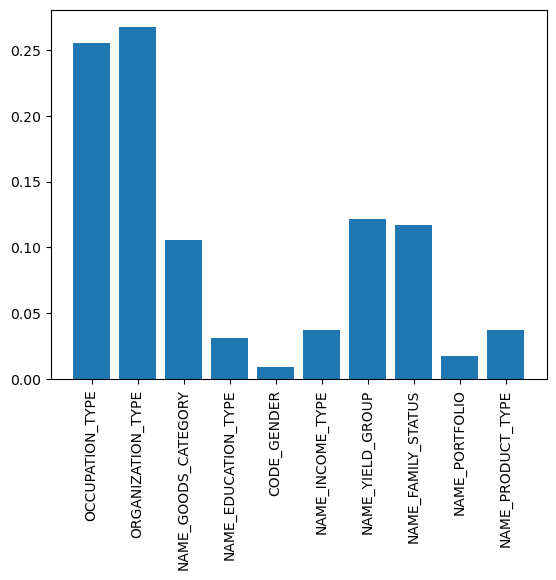

In [27]:
# Pemodelan DecisionTree menggunakan Scikit-learn
start_time = time.time()
model_dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2)
model_dt.fit(xtrainf, y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Total execution time:", execution_time, "seconds")

# Dapatkan skor fitur penting
importances = model_dt.feature_importances_

# Plot fitur penting
plt.bar(xtrainf.columns, importances)
plt.xticks(rotation=90)
plt.show()

Total execution time: 1.2327439785003662 seconds


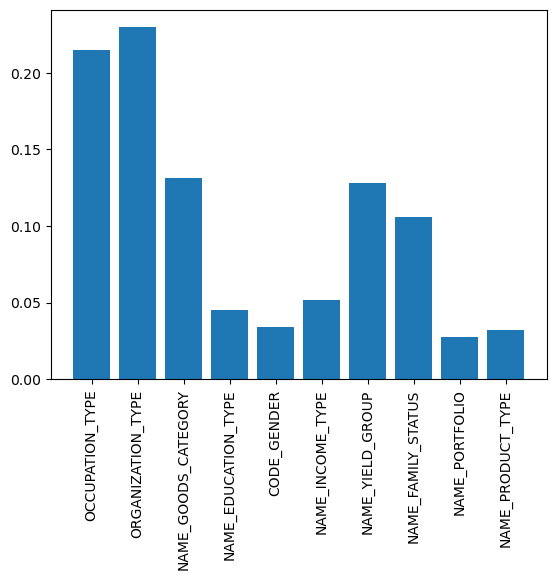

In [28]:
# Pemodelan Random Forest menggunakan Scikit-learn
start_time = time.time()
model_rf = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
model_rf.fit(xtrainf, y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Total execution time:", execution_time, "seconds")

# Dapatkan skor fitur penting
importances = model_rf.feature_importances_

# Plot fitur penting
plt.bar(xtrainf.columns, importances)
plt.xticks(rotation=90)
plt.show()

Total execution time: 2.181165933609009 seconds


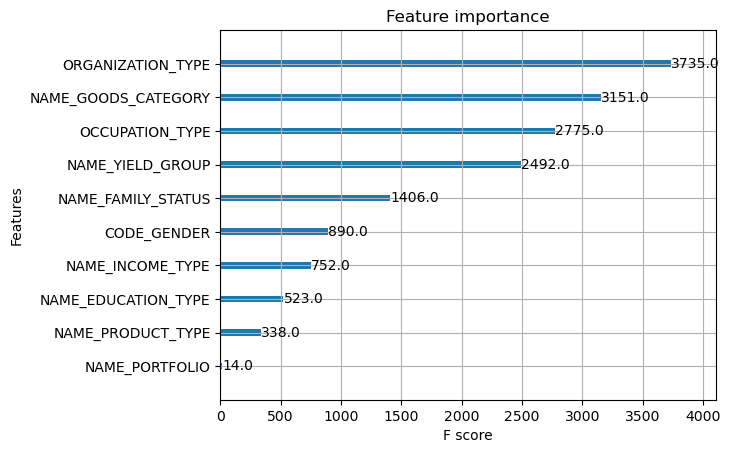

In [29]:
# Pemodelan XGBoost menggunakan Scikit-learn
start_time = time.time()
model_xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=9, n_estimators=300)
model_xgb.fit(xtrainf, y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Total execution time:", execution_time, "seconds")

# Plot fitur penting
plot_importance(model_xgb)
plt.show()

Total execution time: 4.583075284957886 seconds


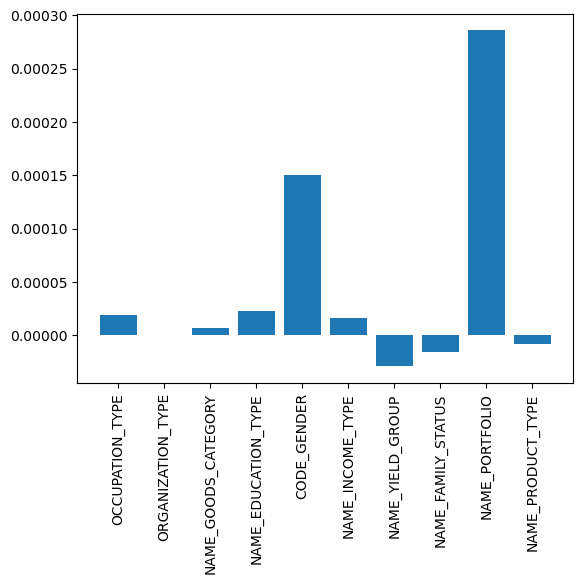

In [30]:
# Pemodelan SVC menggunakan Scikit-learn
start_time = time.time()
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(xtrainf, y_train)
end_time = time.time()
execution_time = end_time - start_time
print("Total execution time:", execution_time, "seconds")

# Mengambil koefisien fitur
coefficients = model_svc.coef_

# Plot koefisien fitur
plt.bar(xtrainf.columns, coefficients[0])
plt.xticks(rotation=90)
plt.show()

In [31]:
# Melakukan cross-validation pada tiap pemodelan
nilaidt = cross_val_score(model_dt, xtrainf, y_train, cv=5)
nilairf = cross_val_score(model_rf, xtrainf, y_train, cv=5)
nilaixgb = cross_val_score(model_xgb, xtrainf, y_train, cv=5)
nilaisvc = cross_val_score(model_svc, xtrainf, y_train, cv=5)

# Mencari nilai performansi dari tiap pemodelan
meandt = nilaidt.mean()
stddt = nilaidt.std()
meanrf = nilairf.mean()
stdrf = nilairf.std()
meanxgb = nilaixgb.mean()
stdxgb = nilaixgb.std()
meansvc = nilaisvc.mean()
stdsvc = nilaisvc.std()

# Membuat DataFrame hasil cross-validation dari tiap model
datacv = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'SVC'],
    'Mean Score': [meandt, meanrf, meanxgb, meansvc],
    'Std Score': [stddt, stdrf, stdxgb, stdsvc]
}
pd.DataFrame(datacv)

,Model,Mean Score,Std Score
0,Decision Tree,0.994321,0.000528
1,Random Forest,0.994365,0.000504
2,XGBoost,0.994409,0.000567
3,SVC,0.959585,0.000044


Berdasarkan nilai Mean Score yang diberikan, model yang paling baik adalah Random Forest dengan skor rata-rata 0.994365 dan standar deviasi 0.000504. Model Random Forest juga memiliki waktu eksekusi total sebesar 1.2327439785003662 detik.

Berdasarkan grafik Plot Importance, fitur yang paling signifikan terhadap kolom TARGET adalah kolom ORGANIZATION_TYPE.

## <font color='green'> g. Model Evaluation </font>

-------- TRAIN ---------
Accuracy: 0.9948050804552159
Precision: 0.94004400440044
Recall: 0.9308278867102396
F1: 0.9354132457580733
ROC-AUC: 0.9641637426348207
-------- TEST ---------
Accuracy: 0.9946511704691782
Precision: 0.9324104234527687
Recall: 0.9354575163398693
F1: 0.933931484502447
ROC-AUC: 0.9663008257472667


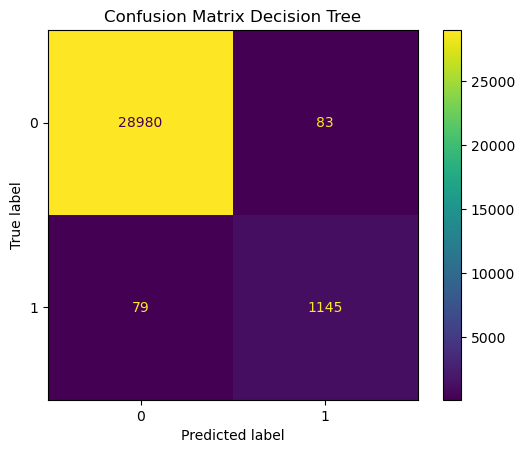

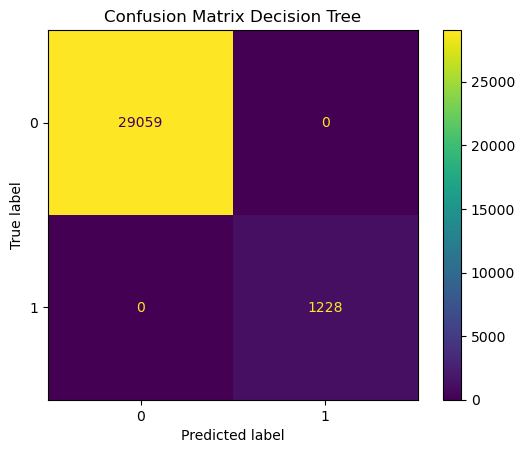

In [32]:
# Perhitungan nilai error Train dan Test dengan Pemodelan Decision Tree

print('-------- TRAIN ---------')
y_train_pred = model_dt.predict(xtrainf)
print('Accuracy:',accuracy_score(y_train, y_train_pred))
print('Precision:',precision_score(y_train, y_train_pred))
print('Recall:',recall_score(y_train, y_train_pred))
print('F1:',f1_score(y_train, y_train_pred))
print('ROC-AUC:',roc_auc_score(y_train, y_train_pred))

print('-------- TEST ---------')
y_test_pred = model_dt.predict(xtestf)
print('Accuracy:',accuracy_score(y_test, y_test_pred))
print('Precision:',precision_score(y_test, y_test_pred))
print('Recall:',recall_score(y_test, y_test_pred))
print('F1:',f1_score(y_test, y_test_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(model_dt, xtestf, y_test)
plt.title("Confusion Matrix Decision Tree")
plt.show()

ConfusionMatrixDisplay.from_estimator(model_dt, xtestf, y_test_pred)
plt.title("Confusion Matrix Decision Tree")
plt.show()

-------- TRAIN ---------
Accuracy: 0.9948050804552159
Precision: 0.94004400440044
Recall: 0.9308278867102396
F1: 0.9354132457580733
ROC-AUC: 0.9641637426348207
-------- TEST ---------
Accuracy: 0.9946511704691782
Precision: 0.9324104234527687
Recall: 0.9354575163398693
F1: 0.933931484502447
ROC-AUC: 0.9663008257472667


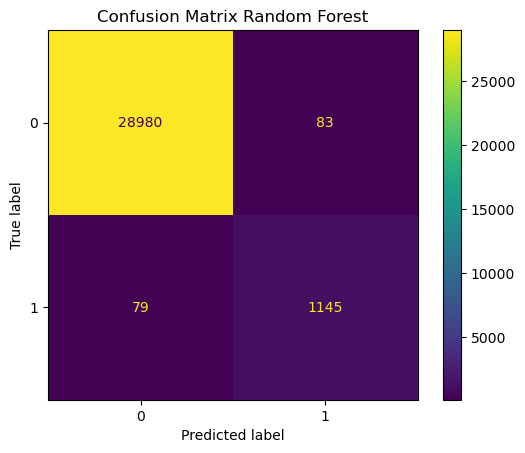

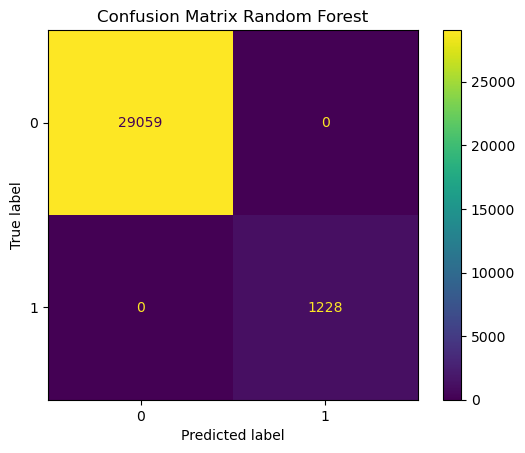

In [33]:
# Perhitungan nilai error Train dan Test dengan Pemodelan Random Forest

print('-------- TRAIN ---------')
y_train_pred = model_rf.predict(xtrainf)
print('Accuracy:',accuracy_score(y_train, y_train_pred))
print('Precision:',precision_score(y_train, y_train_pred))
print('Recall:',recall_score(y_train, y_train_pred))
print('F1:',f1_score(y_train, y_train_pred))
print('ROC-AUC:',roc_auc_score(y_train, y_train_pred))

print('-------- TEST ---------')
y_test_pred = model_rf.predict(xtestf)
print('Accuracy:',accuracy_score(y_test, y_test_pred))
print('Precision:',precision_score(y_test, y_test_pred))
print('Recall:',recall_score(y_test, y_test_pred))
print('F1:',f1_score(y_test, y_test_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(model_rf, xtestf, y_test)
plt.title("Confusion Matrix Random Forest")
plt.show()

ConfusionMatrixDisplay.from_estimator(model_rf, xtestf, y_test_pred)
plt.title("Confusion Matrix Random Forest")
plt.show()

-------- TRAIN ---------
Accuracy: 0.9947830680842633
Precision: 0.9484015703869882
Recall: 0.9210239651416122
F1: 0.9345122962144239
ROC-AUC: 0.9594567672839481
-------- TEST ---------
Accuracy: 0.9947832403341368
Precision: 0.9419568822553898
Recall: 0.9281045751633987
F1: 0.9349794238683128
ROC-AUC: 0.9628480072252323


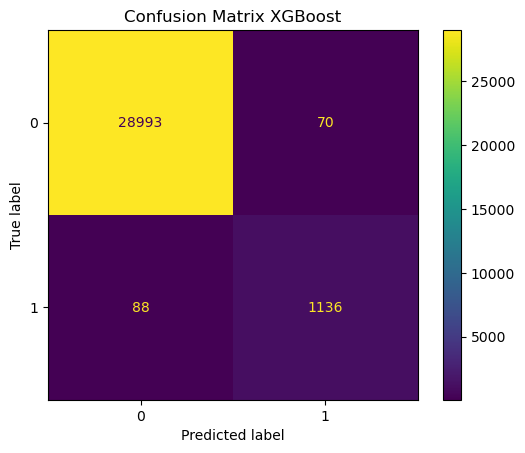

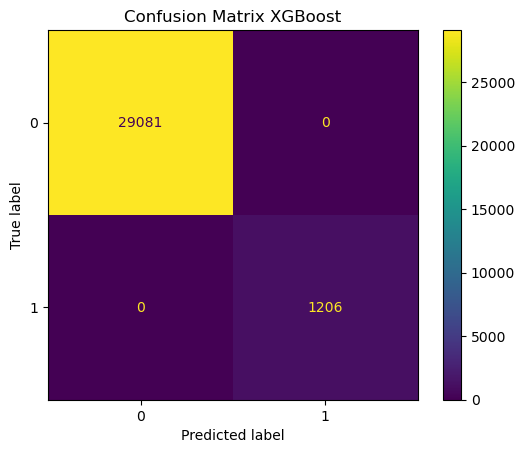

In [34]:
# Perhitungan nilai error Train dan Test dengan Pemodelan XGBoost

print('-------- TRAIN ---------')
y_train_pred = model_xgb.predict(xtrainf)
print('Accuracy:',accuracy_score(y_train, y_train_pred))
print('Precision:',precision_score(y_train, y_train_pred))
print('Recall:',recall_score(y_train, y_train_pred))
print('F1:',f1_score(y_train, y_train_pred))
print('ROC-AUC:',roc_auc_score(y_train, y_train_pred))

print('-------- TEST ---------')
y_test_pred = model_xgb.predict(xtestf)
print('Accuracy:',accuracy_score(y_test, y_test_pred))
print('Precision:',precision_score(y_test, y_test_pred))
print('Recall:',recall_score(y_test, y_test_pred))
print('F1:',f1_score(y_test, y_test_pred))
print('ROC-AUC:',roc_auc_score(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(model_xgb, xtestf, y_test)
plt.title("Confusion Matrix XGBoost")
plt.show()

ConfusionMatrixDisplay.from_estimator(model_xgb, xtestf, y_test_pred)
plt.title("Confusion Matrix XGBoost")
plt.show()

-------- TRAIN ---------
Accuracy: 0.9595852869312553
Precision: 1.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5
-------- TEST ---------
Accuracy: 0.9595866213226797
Precision: 1.0
Recall: 0.0
F1: 0.0
ROC-AUC: 0.5


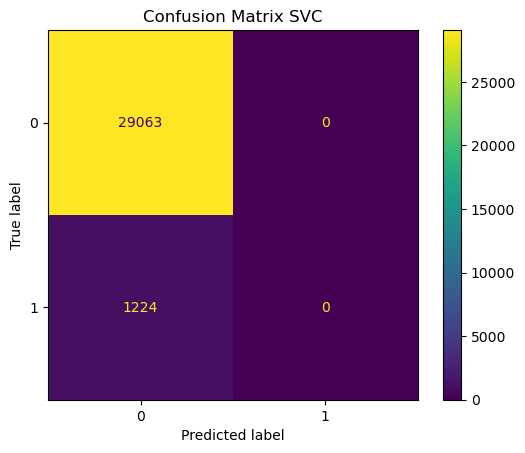

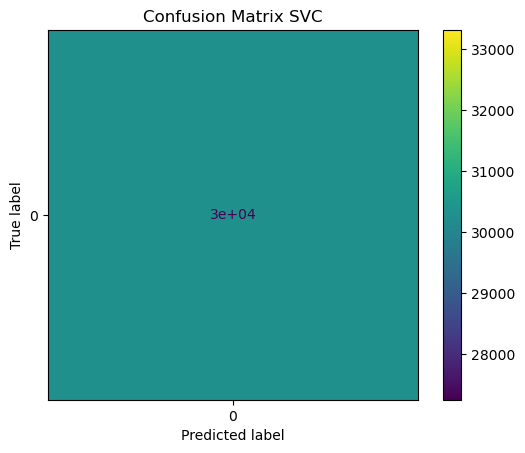

In [35]:
# Perhitungan nilai error Train dan Test dengan Pemodelan SVC

print('-------- TRAIN ---------')
y_train_pred = model_svc.predict(xtrainf)
print('Accuracy:',accuracy_score(y_train, y_train_pred))
print('Precision:',precision_score(y_train, y_train_pred, zero_division=1))
print('Recall:',recall_score(y_train, y_train_pred, zero_division=1))
print('F1:',f1_score(y_train, y_train_pred, zero_division=1))
print('ROC-AUC:',roc_auc_score(y_train, y_train_pred))

print('-------- TEST ---------')
y_test_pred = model_svc.predict(xtestf)
print('Accuracy:',accuracy_score(y_test, y_test_pred))
print('Precision:',precision_score(y_test, y_test_pred, zero_division=1))
print('Recall:',recall_score(y_test, y_test_pred, zero_division=1))
print('F1:',f1_score(y_test, y_test_pred, zero_division=1))
print('ROC-AUC:',roc_auc_score(y_test, y_test_pred))

ConfusionMatrixDisplay.from_estimator(model_svc, xtestf, y_test)
plt.title("Confusion Matrix SVC")
plt.show()

ConfusionMatrixDisplay.from_estimator(model_svc, xtestf, y_test_pred)
plt.title("Confusion Matrix SVC")
plt.show()

Dari hasil yang diberikan, dapat dilihat bahwa model yang paling baik berdasarkan beberapa metrik evaluasi (accuracy, precision, recall, F1 score, dan ROC-AUC) adalah Decision Tree dan Random Forest. Kedua model tersebut memiliki performa yang sangat baik dengan nilai-nilai yang hampir sama di set data pelatihan dan pengujian.

Model XGBoost juga memiliki performa yang baik, tetapi hasilnya sedikit lebih rendah dibandingkan dengan Decision Tree dan Random Forest.

Sementara itu, model SVC (Support Vector Classifier) tidak memberikan hasil yang baik dalam hal evaluasi performa. Nilai recall, F1 score, dan ROC-AUC pada model ini sangat rendah, menunjukkan bahwa model tidak dapat mengklasifikasikan data dengan baik.

## <font color='green'> h. Model Saving </font>

In [36]:
# Proses penyimpanan model
with open('model_rf.pkl', 'wb') as file_1:
  joblib.dump(model_rf, file_1)
with open('final_fitur.joblib', 'wb') as file_2:
  joblib.dump(final_fitur, file_2)

# <font color='blue'> v. Conclusion / Overall Analysis </font>

**Berdasarkan hasil EDA didapat informasi:**
* Data terdiri dari 75.716 baris.
* Rata-rata target adalah 0,04 yang menunjukkan bahwa sebagian besar kredit tidak mengalami default.
* Terdapat perbedaan skala antara variabel-variabel numerik sehingga diperlukan standarisasi agar variabel memiliki skala yang sama.
* Tidak ada missing value untuk semua kolom yang digunakan.
* Jumlah kedua status tidak seimbang, oleh sebab itu pengolahan data train dan test dilakukan dengan cara stratify untuk memastikan pendistribusian data seimbang.
* Kolom DAYS_CREDIT, DAYS_ENDDATE_FACT, DAYS_CREDIT_UPDATE, DAYS_INSTALMENT, DAYS_ENTRY_PAYMENT perlu dilakukan Handling Outlier.
* Kolom DAYS_CREDIT_ENDDATE, AMT_CREDIT_MAX_OVERDUE, AMT_CREDIT_SUM, AMT_APPLICATION, AMT_INSTALMENT, AMT_PAYMENT perlu dilakukan Handling Outlier dan Standarisasi.

**Berdasarkan model evaluasi:**
* Decision Tree memiliki mean score sebesar 0.994321. Model ini memiliki performa yang sangat baik dengan tingkat akurasi, presisi, recall, dan F1-score yang tinggi baik pada data latih maupun data uji.
* Random Forest memiliki mean score sebesar 0.994365. Model ini juga memiliki kinerja yang sangat baik dengan tingkat akurasi, presisi, recall, dan F1-score yang tinggi pada data latih dan data uji.
* XGBoost memiliki mean score sebesar 0.994409. Model ini masih memiliki kinerja yang baik dengan tingkat akurasi, presisi, recall, dan F1-score yang tinggi pada data latih dan data uji.
* SVC memiliki mean score sebesar 0.959585. Model ini memiliki kinerja yang jauh lebih rendah dibandingkan tiga model sebelumnya, dengan recall dan F1-score pada data latih dan data uji yang bernilai 0. Model ini tampaknya tidak dapat memprediksi kelas positif dengan baik.

**Hubungan dengan Domain Bisnis:**

Berdasarkan model evaluasi, model Decision Tree dan Random Forest memiliki performa yang cukup baik dan serupa. Namun, jika harus memilih satu model, model Random Forest dapat dipilih karena dapat mengatasi masalah Overfitting. Selain itu, model XGBoost juga memberikan performa yang baik. Namun, model SVC memiliki performa yang rendah dan tidak menghasilkan prediksi yang baik.

**Kelebihan dari model Random Forest adalah:**
* Dapat mengatasi masalah Overfitting.

**Kelemahan dari model Random Forest adalah:**
* Struktur lebih sulit dipahami.

**Untuk Meningkatkan Performa Model, hal yang bisa dilakukan antara lain:**

* Menggunakan algoritma yang lebih kompleks.
* Menambah lebih banyak fitur.
* Melakukan preprocessing data dengan lebih baik.